# Parcial 2

<img src="PORTADA.png">

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Liberirias para crear la interface.

import ipywidgets as widgets
from __future__ import print_function
from ipywidgets import interact_manual
from random import randint
from IPython.display import display
from IPython.display import clear_output
import glob
from skimage.color import rgb2gray
from skimage.feature import (match_descriptors, corner_harris,
 corner_peaks, ORB, plot_matches)
from skimage import data
from skimage import transform as tf
import skimage.io as io
%matplotlib inline

In [2]:
files = glob.glob ("DataSetCosas/*.png") # Cargamos todas las imagenes.
data,images,target,coca,toy,ball = [],[],[],[],[],[]
i = 0
for myFile in files:
    #cargamos una imagen de color en modo escala de grisis
    img = io.imread(myFile)
    img = rgb2gray(img)
    images.append (img)
    a = img.reshape((22500 ,))
    data.append(a)
    
    if i <= 199:
        target.append(0)
        coca.append(1)
        toy.append(0)
        ball.append(0)
    elif i > 199 and i <= 399:
        target.append(1)
        coca.append(0)
        toy.append(1)
        ball.append(0)
    else:
        target.append(2)
        coca.append(0)
        toy.append(0)
        ball.append(1)
    i+=1

In [3]:
def mostrarObjetos(images, target, top_n):
    # definir el tamaño de la configuracion de la matriz de imagenes
    fig = plt.figure(figsize=(12,12))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.0)
    for i in range(top_n):
        num = randint(0,599)
        #dibujar las imagenes en una matriz de 20x20
        d= fig.add_subplot(10,10, i+1, xticks=[], yticks=[])
        d.imshow(images[num], cmap=plt.cm.bone)
        
        if target[num]==0:
            d.text(40,140,"Cocacola",style="italic",bbox={"facecolor":"red","alpha":0.8,"pad":10}) 
        elif target[num]==1:
            d.text(40,140,"Juguete",style="italic",bbox={"facecolor":"blue","alpha":0.8,"pad":10})
        else:
            d.text(40,140,"Pelota",style="italic",bbox={"facecolor":"green","alpha":0.8,"pad":10})
        
        # Etiquetada de cada imagen con target de tipo valor
        #d.text(0, 14, str(target[num]))

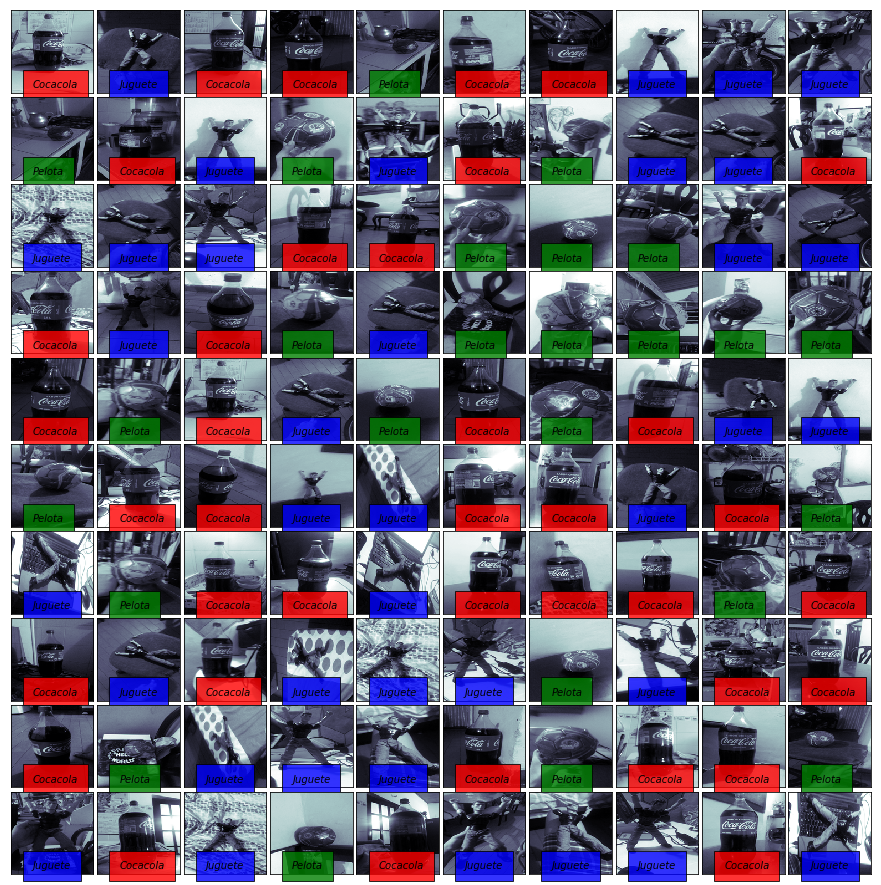

In [4]:
mostrarObjetos(images, target, 100)

# Entrenar con pelota

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [6]:
X = data
y_ball = ball # Variable objetiva (es lo que se desea predecir)
X_ball_train, X_ball_test, y_ball_train, y_ball_test = train_test_split(X,y_ball, test_size=0.3)
rft_ball = RandomForestClassifier(n_estimators=100)
rft_ball.fit(X_ball_train,y_ball_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [7]:
rft_ball_pred = rft_ball.predict(X_ball_test)
print(classification_report(y_ball_test,rft_ball_pred))
print(confusion_matrix(y_ball_test,rft_ball_pred))

             precision    recall  f1-score   support

          0       0.88      0.98      0.93       122
          1       0.93      0.72      0.82        58

avg / total       0.90      0.89      0.89       180

[[119   3]
 [ 16  42]]


# Entrenar Coca Cola

In [8]:
X = data
y_coca = coca # Variable objetiva (es lo que se desea predecir)
X_coca_train, X_coca_test, y_coca_train, y_coca_test = train_test_split(X,y_coca, test_size=0.3)
rft_coca = RandomForestClassifier(n_estimators=100)
rft_coca.fit(X_coca_train,y_coca_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [9]:
rft_coca_pred = rft_coca.predict(X_coca_test)
print(classification_report(y_coca_test,rft_coca_pred))
print(confusion_matrix(y_coca_test,rft_coca_pred))

             precision    recall  f1-score   support

          0       0.98      0.98      0.98       125
          1       0.96      0.96      0.96        55

avg / total       0.98      0.98      0.98       180

[[123   2]
 [  2  53]]


# Entrenar juguete

In [10]:
X = data
y_toy = toy # Variable objetiva (es lo que se desea predecir)
X_toy_train, X_toy_test, y_toy_train, y_toy_test = train_test_split(X,y_toy, test_size=0.3)
rft_toy = RandomForestClassifier(n_estimators=100)
rft_toy.fit(X_toy_train,y_toy_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [ ]:
rft_toy_pred = rft_toy.predict(X_toy_test)
print(classification_report(y_toy_test,rft_toy_pred))
print(confusion_matrix(y_toy_test,rft_toy_pred))

             precision    recall  f1-score   support

          0       0.92      0.91      0.92       120
          1       0.82      0.85      0.84        60

avg / total       0.89      0.89      0.89       180

[[109  11]
 [  9  51]]


In [ ]:
from skimage import data
from skimage.feature import match_template
from scipy import misc

image = io.imread("FotoResultante/Redimensionada/resultante (9).png")
image = rgb2gray(image)
coca_matches = []
xx1 = []
yy1 = []
xx2 = []
yy2 = []
xx3 = []
yy3 = []

for i in range(600):
    if i <= 199:
        coca = io.imread("DataSetCosas/cocacola ("+str(i+1)+").png")
        coca = rgb2gray(coca)
        result1 = match_template(image, coca)
        ij1 = np.unravel_index(np.argmax(result1), result1.shape)
        x1, y1 = ij1[::-1]
        coca_coords = [x1, y1, x1+150, y1+150]   
        coca_in_image = image[coca_coords[1]:coca_coords[3],coca_coords[0]:coca_coords[2]]
        misc.imsave('matches/coca_in_image ('+str(i+1)+').png', coca_in_image) # uses the Image module (PIL)
        jesus = io.imread('matches/coca_in_image ('+str(i+1)+').png')
        rfc_w = rft_coca.predict(jesus.reshape(1,-1))
        coca_matches.append(rfc_w[0])
        if rfc_w[0] == 1:
            xd, yd = ij1[::-1]
            xx1.append(xd)
            yy1.append(yd)
            
    elif i > 199 and i <= 399:
        toy = io.imread("DataSetCosas/juguete ("+str((i+1)-200)+").png")
        toy = rgb2gray(toy)
        result2 = match_template(image, toy)
        ij2 = np.unravel_index(np.argmax(result2), result2.shape)
        x2, y2 = ij2[::-1]
        toy_coords = [x2, y2, x2+150, y2+150]   
        toy_in_image = image[toy_coords[1]:toy_coords[3],toy_coords[0]:toy_coords[2]]
        misc.imsave('matches/toy_in_image ('+str((i+1)-200)+').png', toy_in_image) # uses the Image module (PIL)
        jesus = io.imread('matches/toy_in_image ('+str((i+1)-200)+').png')
        rfc_w = rft_toy.predict(jesus.reshape(1,-1))
        coca_matches.append(rfc_w[0])
        if rfc_w[0] == 1:
            xt, yt = ij2[::-1]
            xx2.append(xt)
            yy2.append(yt)
    else:
        pelota = io.imread("DataSetCosas/pelota ("+str((i+1)-400)+").png")
        pelota = rgb2gray(pelota)
        result3 = match_template(image, pelota)
        ij3 = np.unravel_index(np.argmax(result3), result3.shape)
        x3, y3 = ij3[::-1]
        pelota_coords = [x3, y3, x3+150, y3+150]   
        pelota_in_image = image[pelota_coords[1]:pelota_coords[3],pelota_coords[0]:pelota_coords[2]]
        misc.imsave('matches/pelota_in_image ('+str((i+1)-400)+').png', pelota_in_image) # uses the Image module (PIL)
        jesus = io.imread('matches/pelota_in_image ('+str((i+1)-400)+').png')
        rfc_w = rft_ball.predict(jesus.reshape(1,-1))
        coca_matches.append(rfc_w[0])
        if rfc_w[0] == 1:
            xp, yp = ij3[::-1]
            xx3.append(xp)
            yy3.append(yp)

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:57: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


In [ ]:
promxx1 = int(np.average(xx1)) 
promyy1 = int(np.average(yy1))
promxx2 = int(np.average(xx2))
promyy2 = int(np.average(yy2))
promxx3 = int(np.average(xx3))  
promyy3 = int(np.average(yy3))  

In [ ]:
xx1d,yy1d,xx2d,yy2d,xx3d,yy3d = [],[],[],[],[],[]

for j in range(len(xx1)):
    if (int(abs(xx1[j]-promxx1)) < int(np.std(xx1))) and (int(abs(yy1[j]-promyy1)) < int(np.std(yy1))):
        xx1d.append(xx1[j])
        yy1d.append(yy1[j])
for j in range(len(xx2)):
    if (int(abs(xx2[j]-promxx2)) < int(np.std(xx2))) and (int(abs(yy2[j]-promyy2)) < int(np.std(yy2))):
        xx2d.append(xx2[j])
        yy2d.append(yy2[j])
        
for j in range(len(xx3)):
    if (int(abs(xx3[j]-promxx3)) < int(np.std(xx3))) and (int(abs(yy3[j]-promyy3)) < int(np.std(yy3))):
        xx3d.append(xx3[j])
        yy3d.append(yy3[j])

promxx1d = int(np.average(xx1d)) 
promyy1d = int(np.average(yy1d)) 
promxx2d = int(np.average(xx2d)) 
promyy2d = int(np.average(yy2d)) 
promxx3d = int(np.average(xx3d)) 
promyy3d = int(np.average(yy3d))

xx1dd,yy1dd,xx2dd,yy2dd,xx3dd,yy3dd = [],[],[],[],[],[]

for j in range(len(xx1d)):
    if (int(abs(xx1d[j]-promxx1d)) < int(np.std(xx1d))) and (int(abs(yy1d[j]-promyy1d)) < int(np.std(yy1d))):
        xx1dd.append(xx1d[j])
        yy1dd.append(yy1d[j])
for j in range(len(xx2d)):
    if (int(abs(xx2d[j]-promxx2d)) < int(np.std(xx2d))) and (int(abs(yy2d[j]-promyy2d)) < int(np.std(yy2d))):
        xx2dd.append(xx2d[j])
        yy2dd.append(yy2d[j])
        
for j in range(len(xx3d)):
    if (int(abs(xx3d[j]-promxx3d)) < int(np.std(xx3d))) and (int(abs(yy3d[j]-promyy3d)) < int(np.std(yy3d))):
        xx3dd.append(xx3d[j])
        yy3dd.append(yy3d[j])

promxx1dd = int(np.average(xx1dd)) 
promyy1dd = int(np.average(yy1dd)) 
promxx2dd = int(np.average(xx2dd)) 
promyy2dd = int(np.average(yy2dd)) 
promxx3dd = int(np.average(xx3dd)) 
promyy3dd = int(np.average(yy3dd)) 

In [ ]:
fig = plt.figure(figsize=(36, 24))
ax1 = plt.subplot(1, 3, 1)

ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_axis_off()
ax1.set_title('image')
hcoin, wcoin = coca.shape
rect1 = plt.Rectangle((promxx1dd, promyy1dd), wcoin, hcoin, edgecolor='r', facecolor='none',linewidth=3,linestyle='solid')
rect2 = plt.Rectangle((promxx2dd, promyy2dd), wcoin, hcoin, edgecolor='b', facecolor='none',linewidth=3,linestyle='dashed')
rect3 = plt.Rectangle((promxx3dd, promyy3dd), wcoin, hcoin, edgecolor='y', facecolor='none', linewidth=3,linestyle='dotted')
ax1.add_patch(rect1)
ax1.add_patch(rect2)
ax1.add_patch(rect3)
ax1.legend(['Cocacola','Juguete','Pelota'],loc='lower left')
plt.show()